<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap10/10_5_Convolution_For_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.5: Convolution for MNIST**

This notebook builds a proper network for 2D convolution.  It works with the MNIST dataset (figure 15.15a), which was the original classic dataset for classifying images.  The network will take a 28x28 grayscale image and classify it into one of 10 classes representing a digit.

The code is adapted from https://nextjournal.com/gkoehler/pytorch-mnist

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

In [2]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches

# (It may complain that some files are missing because the files seem to have been
# reorganized on the underlying website, but it still seems to work). If everything is working
# properly, then the whole notebook should run to the end without further problems
# even before you make changes.
batch_size_train = 64
batch_size_test = 1000

# TODO Change this directory to point towards an existing directory
myDir = 'dataset/'

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(myDir, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 13857581.91it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 349970.66it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3586539.27it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 12915612.72it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



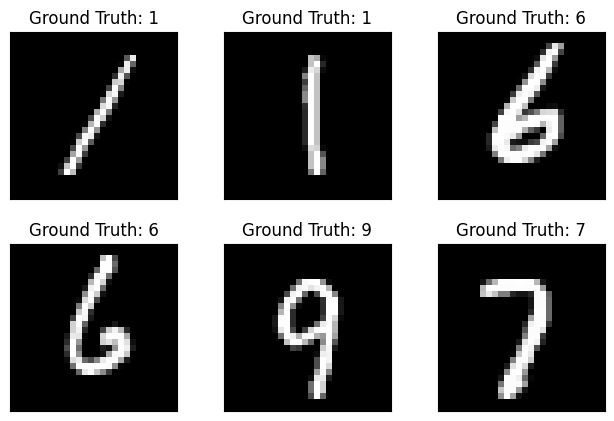

In [3]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

Define the network.  This is a more typical way to define a network than the sequential structure.  We define a class for the network, and define the parameters in the constructor.  Then we use a function called forward to actually run the network.  It's easy to see how you might use residual connections in this format.

In [4]:
from os import X_OK
# TODO Change this class to implement
# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

# Replace this class which implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)

        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        # Dropout for convolutions
        self.drop = nn.Dropout2d(0.3)
        # Fully connected layer
        self.fc1 = nn.Linear(320, 50)

        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # convolution 1
        x = self.conv1(x)
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(x)

        # convolution 2
        x = self.conv2(x)
        x = self.drop(x)
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(x)
        x = x.flatten(1)

        # fully connected layer 1
        x = self.fc1(x)
        x = F.relu(x)

        # fully connected layer 2
        x = self.fc2(x)
        x = F.log_softmax(x)

        return x


model = Net()

In [5]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

#%%
# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [6]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [7]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [8]:
# Get initial performance
test()
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/tmp/ipykernel_19108/2520472723.py:50: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)
/home/cynthia/.local/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.6002, Accuracy: 944/10000 (9%)

Train Epoch: 1 [0/60000]	Loss: 2.712520
Train Epoch: 1 [640/60000]	Loss: 2.130361
Train Epoch: 1 [1280/60000]	Loss: 1.836928
Train Epoch: 1 [1920/60000]	Loss: 1.554698
Train Epoch: 1 [2560/60000]	Loss: 1.405237
Train Epoch: 1 [3200/60000]	Loss: 1.293328
Train Epoch: 1 [3840/60000]	Loss: 1.027579
Train Epoch: 1 [4480/60000]	Loss: 0.723676
Train Epoch: 1 [5120/60000]	Loss: 0.642801
Train Epoch: 1 [5760/60000]	Loss: 0.562525
Train Epoch: 1 [6400/60000]	Loss: 0.757509
Train Epoch: 1 [7040/60000]	Loss: 0.606320
Train Epoch: 1 [7680/60000]	Loss: 0.518081
Train Epoch: 1 [8320/60000]	Loss: 0.423685
Train Epoch: 1 [8960/60000]	Loss: 0.770628
Train Epoch: 1 [9600/60000]	Loss: 0.440635
Train Epoch: 1 [10240/60000]	Loss: 0.685876
Train Epoch: 1 [10880/60000]	Loss: 0.409353
Train Epoch: 1 [11520/60000]	Loss: 0.290158
Train Epoch: 1 [12160/60000]	Loss: 0.357201
Train Epoch: 1 [12800/60000]	Loss: 0.240132
Train Epoch: 1 [13440/60000]	Loss: 0.487

Train Epoch: 2 [58240/60000]	Loss: 0.132088
Train Epoch: 2 [58880/60000]	Loss: 0.095673
Train Epoch: 2 [59520/60000]	Loss: 0.113871

Test set: Avg. loss: 0.0744, Accuracy: 9773/10000 (98%)

Train Epoch: 3 [0/60000]	Loss: 0.124456
Train Epoch: 3 [640/60000]	Loss: 0.096748
Train Epoch: 3 [1280/60000]	Loss: 0.090895
Train Epoch: 3 [1920/60000]	Loss: 0.090697
Train Epoch: 3 [2560/60000]	Loss: 0.112264
Train Epoch: 3 [3200/60000]	Loss: 0.087173
Train Epoch: 3 [3840/60000]	Loss: 0.011942
Train Epoch: 3 [4480/60000]	Loss: 0.062467
Train Epoch: 3 [5120/60000]	Loss: 0.233378
Train Epoch: 3 [5760/60000]	Loss: 0.164822
Train Epoch: 3 [6400/60000]	Loss: 0.034357
Train Epoch: 3 [7040/60000]	Loss: 0.071989
Train Epoch: 3 [7680/60000]	Loss: 0.164246
Train Epoch: 3 [8320/60000]	Loss: 0.249833
Train Epoch: 3 [8960/60000]	Loss: 0.071351
Train Epoch: 3 [9600/60000]	Loss: 0.053545
Train Epoch: 3 [10240/60000]	Loss: 0.279517
Train Epoch: 3 [10880/60000]	Loss: 0.081143
Train Epoch: 3 [11520/60000]	Loss: 0.2

/tmp/ipykernel_19108/2520472723.py:50: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


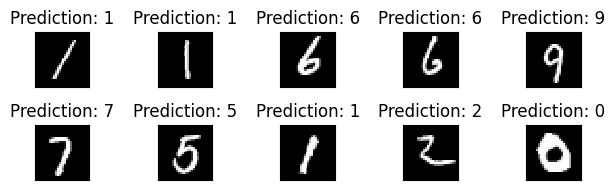

In [9]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()